In [31]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [32]:
sys.path.append(os.path.abspath("../scripts"))

In [33]:
from db_utils import connect_to_database, fetch_data, close_connection
from queries import query_telecom_data

In [34]:
# Connect to the database using parameters from the .env file
conn = connect_to_database()

Database connection successful!


In [35]:
query="SELECT * from xdr_data;"

In [36]:
# Fetch data using the query
if conn:
    telecom_data = fetch_data(conn, query)
    close_connection(conn)

# Display the first few rows of the data
if telecom_data is not None:
    print(telecom_data.head())


c:\Users\user\Projects\Business-Data-Analysis-for-TellCo\scripts\db_utils.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Data fetched successfully!
Database connection closed!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                

In [37]:
query_handsets = """
SELECT 
    "Handset Type", 
    "Handset Manufacturer" 
FROM xdr_data;
"""

# Fetch data
conn = connect_to_database()
if conn:
    telecom_data = fetch_data(conn, query_handsets)
    close_connection(conn)

# Check the data
print(telecom_data.head())


Database connection successful!
Data fetched successfully!


c:\Users\user\Projects\Business-Data-Analysis-for-TellCo\scripts\db_utils.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Database connection closed!
                  Handset Type Handset Manufacturer
0   Samsung Galaxy A5 Sm-A520F              Samsung
1  Samsung Galaxy J5 (Sm-J530)              Samsung
2     Samsung Galaxy A8 (2018)              Samsung
3                    undefined            undefined
4             Samsung Sm-G390F              Samsung


In [38]:
# Identify the top 10 handsets
top_10_handsets = telecom_data['Handset Type'].value_counts().head(10)

# Display the results
print("Top 10 Handsets:")
print(top_10_handsets)


Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_8892\319638489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


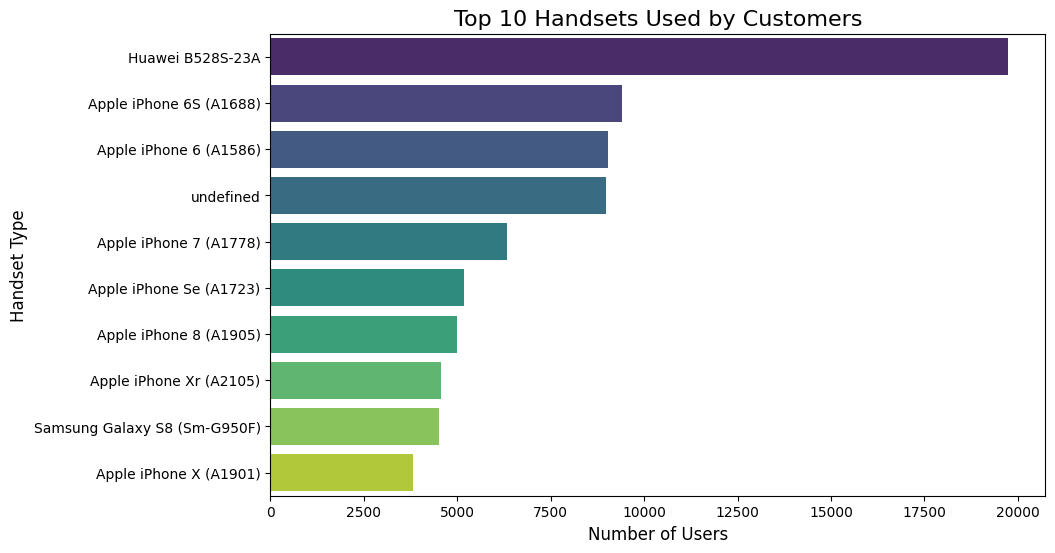

In [39]:
# Plotting top 10 handsets
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_handsets.values,
    y=top_10_handsets.index,
    palette='viridis'
)
plt.title("Top 10 Handsets Used by Customers", fontsize=16)
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("Handset Type", fontsize=12)
plt.show()

In [40]:
# Identify the top 3 manufacturers
top_3_manufacturers = telecom_data['Handset Manufacturer'].value_counts().head(3)

# Display the results
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


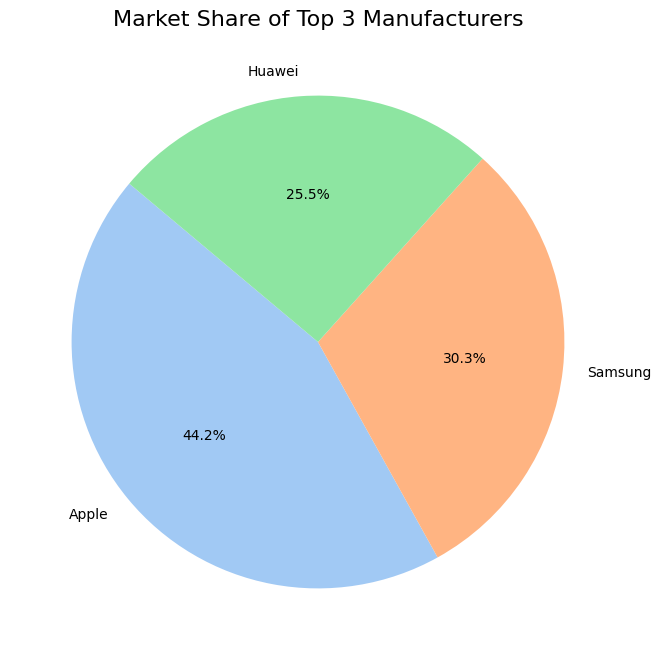

In [41]:
# Plotting top 3 manufacturers
plt.figure(figsize=(8, 8))
plt.pie(
    top_3_manufacturers.values,
    labels=top_3_manufacturers.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Market Share of Top 3 Manufacturers", fontsize=16)
plt.show()


In [42]:
# Get the top 3 manufacturers
top_manufacturer_names = top_3_manufacturers.index

# Loop through each manufacturer and find the top 5 handsets
for manufacturer in top_manufacturer_names:
    top_5_handsets = telecom_data[telecom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_5_handsets)



Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_8892\2556424692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


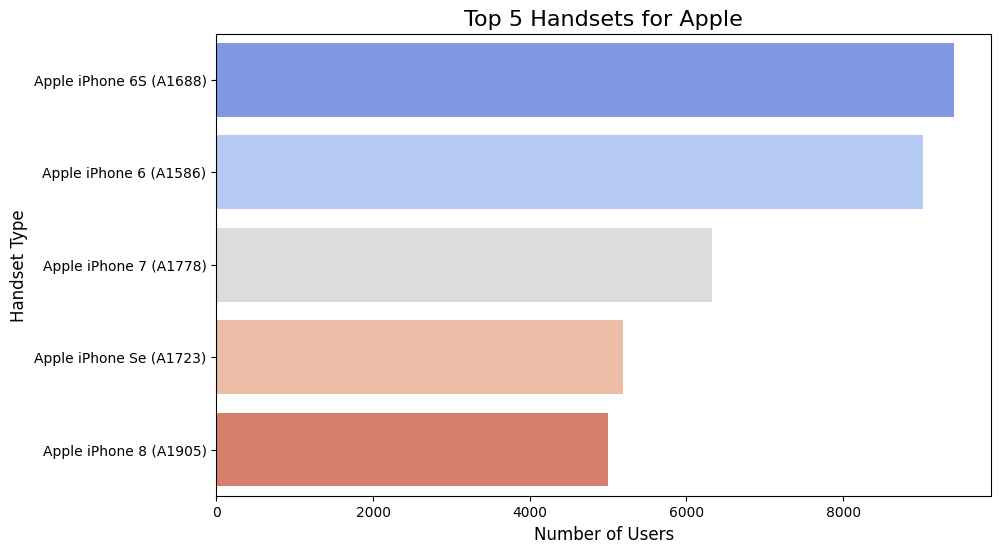

C:\Users\user\AppData\Local\Temp\ipykernel_8892\2556424692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


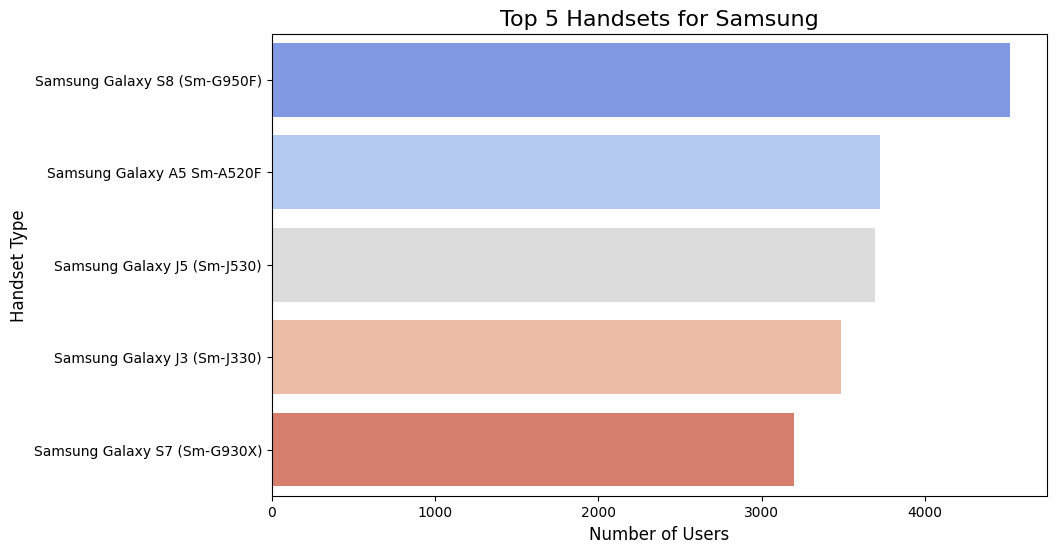

C:\Users\user\AppData\Local\Temp\ipykernel_8892\2556424692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


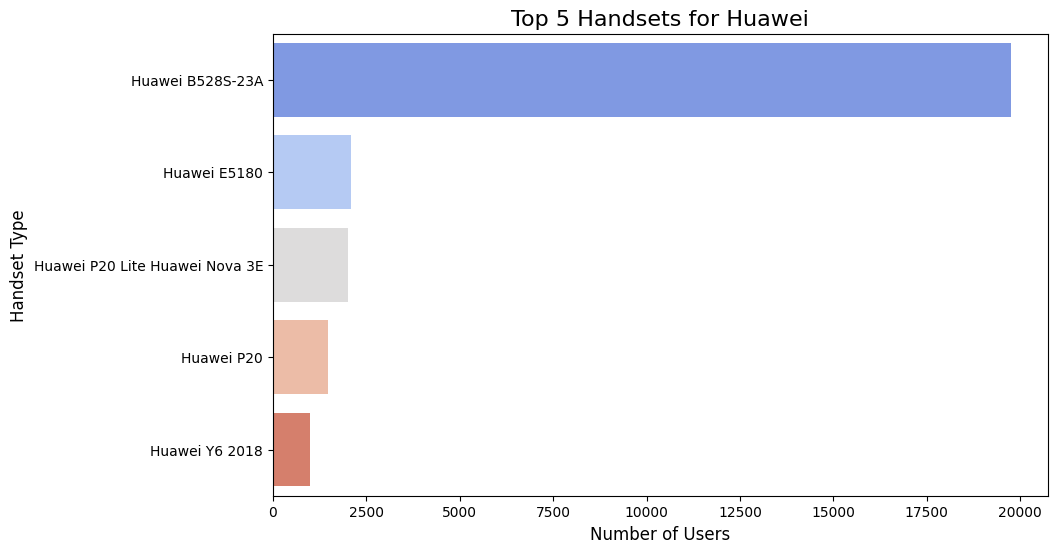

In [43]:
# Plotting top 5 handsets for each manufacturer
for manufacturer in top_manufacturer_names:
    top_5_handsets = telecom_data[telecom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_5_handsets.values,
        y=top_5_handsets.index,
        palette='coolwarm'
    )
    plt.title(f"Top 5 Handsets for {manufacturer}", fontsize=16)
    plt.xlabel("Number of Users", fontsize=12)
    plt.ylabel("Handset Type", fontsize=12)
    plt.show()


In [46]:
conn = connect_to_database()

# Fetch data from the table
query = "SELECT * FROM xdr_data LIMIT 1;"  # Fetch one row to inspect schema
df = pd.read_sql_query(query, conn)

# Display column names
print("Column Names:", df.columns.tolist())

Database connection successful!
Column Names: ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',

C:\Users\user\AppData\Local\Temp\ipykernel_8892\2766773891.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [60]:
# Connect to the database
conn = connect_to_database()

# SQL query for aggregation
query = """
SELECT 
    "MSISDN/Number" AS user_id,
    COUNT(DISTINCT "Bearer Id") AS xdr_sessions,  -- Number of xDR sessions
    SUM("Dur. (ms)") AS total_session_duration_ms,  -- Total session duration
    SUM("Total DL (Bytes)") AS total_download_bytes,  -- Total download data
    SUM("Total UL (Bytes)") AS total_upload_bytes,  -- Total upload data
    SUM("Social Media DL (Bytes)" + "Social Media UL (Bytes)") AS social_media_data_bytes,
    SUM("Google DL (Bytes)" + "Google UL (Bytes)") AS google_data_bytes,
    SUM("Email DL (Bytes)" + "Email UL (Bytes)") AS email_data_bytes,
    SUM("Youtube DL (Bytes)" + "Youtube UL (Bytes)") AS youtube_data_bytes,
    SUM("Netflix DL (Bytes)" + "Netflix UL (Bytes)") AS netflix_data_bytes,
    SUM("Gaming DL (Bytes)" + "Gaming UL (Bytes)") AS gaming_data_bytes,
    SUM("Other DL (Bytes)" + "Other UL (Bytes)") AS other_data_bytes
FROM xdr_data
GROUP BY "MSISDN/Number";
"""

# Fetch the data
user_behavior = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the aggregated data
print(user_behavior.head())


Database connection successful!


C:\Users\user\AppData\Local\Temp\ipykernel_6176\1338290217.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_behavior = pd.read_sql_query(query, conn)


        user_id  xdr_sessions  total_session_duration_ms  \
0  3.360100e+10             1                   116720.0   
1  3.360100e+10             1                   181230.0   
2  3.360100e+10             1                   134969.0   
3  3.360101e+10             1                    49878.0   
4  3.360101e+10             2                    37104.0   

   total_download_bytes  total_upload_bytes  social_media_data_bytes  \
0          8.426375e+08          36053108.0                2232135.0   
1          1.207552e+08          36104459.0                2660565.0   
2          5.566597e+08          39306820.0                3195623.0   
3          4.019932e+08          20327526.0                 280294.0   
4          1.363130e+09          94280527.0                2912542.0   

   google_data_bytes  email_data_bytes  youtube_data_bytes  \
0          4389005.0         1331362.0          21624548.0   
1          5334863.0         3307781.0          12432223.0   
2          3443126.0

In [62]:
user_behavior.head()

,user_id,xdr_sessions,total_session_duration_ms,total_download_bytes,total_upload_bytes,social_media_data_bytes,google_data_bytes,email_data_bytes,youtube_data_bytes,netflix_data_bytes,gaming_data_bytes,other_data_bytes
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [64]:
# Add total data volume (Bytes)
user_behavior["total_data_volume_bytes"] = (
    user_behavior["total_download_bytes"] + user_behavior["total_upload_bytes"]
)

# Display the updated DataFrame
user_behavior.head()


,user_id,xdr_sessions,total_session_duration_ms,total_download_bytes,total_upload_bytes,social_media_data_bytes,google_data_bytes,email_data_bytes,youtube_data_bytes,netflix_data_bytes,gaming_data_bytes,other_data_bytes,total_data_volume_bytes
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09


In [67]:
# Save to a CSV file
user_behavior.to_csv(r"..\Data\user_behavior_summary.csv", index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_6176\3016093417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


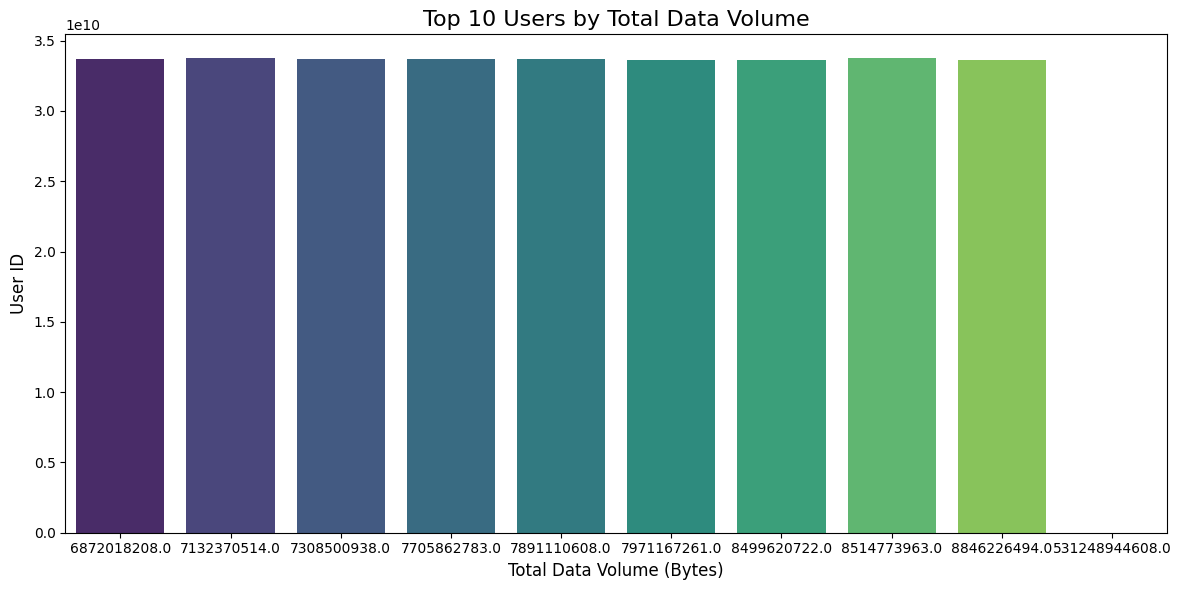

In [68]:
# Sort and select the top 10 users by total data volume
top_users = user_behavior.nlargest(10, "total_data_volume_bytes")

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x="total_data_volume_bytes",
    y="user_id",
    data=top_users,
    palette="viridis"
)
plt.title("Top 10 Users by Total Data Volume", fontsize=16)
plt.xlabel("Total Data Volume (Bytes)", fontsize=12)
plt.ylabel("User ID", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6176\575360412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


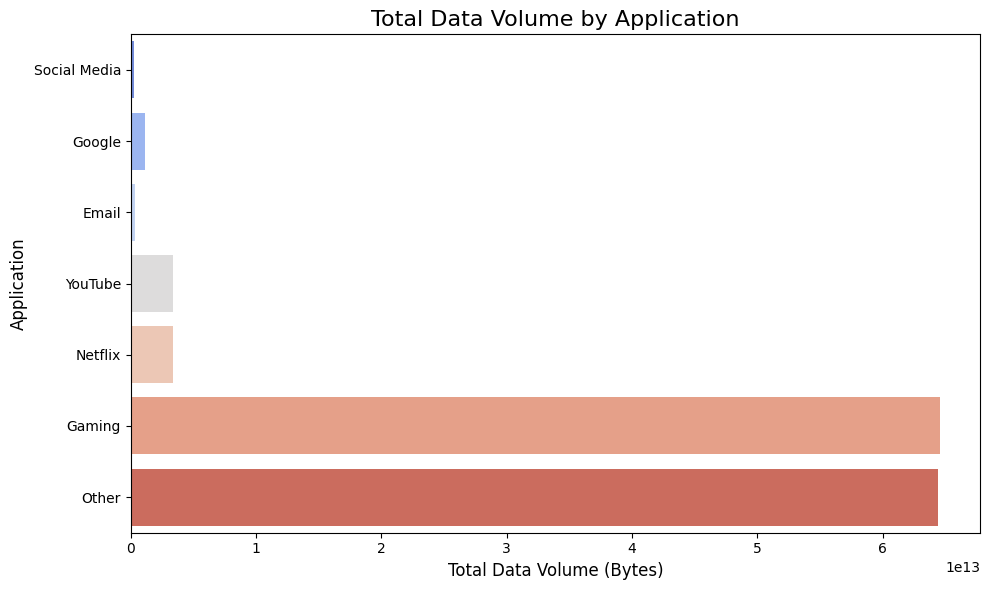

In [69]:
# Sum data for each application
application_usage = {
    "Social Media": user_behavior["social_media_data_bytes"].sum(),
    "Google": user_behavior["google_data_bytes"].sum(),
    "Email": user_behavior["email_data_bytes"].sum(),
    "YouTube": user_behavior["youtube_data_bytes"].sum(),
    "Netflix": user_behavior["netflix_data_bytes"].sum(),
    "Gaming": user_behavior["gaming_data_bytes"].sum(),
    "Other": user_behavior["other_data_bytes"].sum()
}

# Convert to a DataFrame for plotting
app_usage_df = pd.DataFrame(list(application_usage.items()), columns=["Application", "Total Data Volume (Bytes)"])

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Total Data Volume (Bytes)",
    y="Application",
    data=app_usage_df,
    palette="coolwarm"
)
plt.title("Total Data Volume by Application", fontsize=16)
plt.xlabel("Total Data Volume (Bytes)", fontsize=12)
plt.ylabel("Application", fontsize=12)
plt.tight_layout()
plt.show()


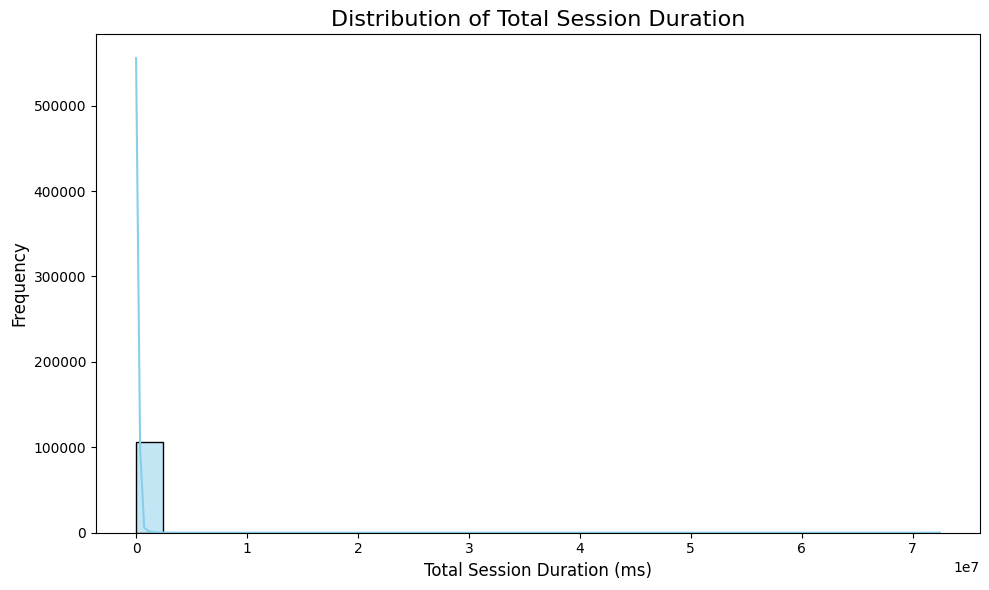

In [70]:
# Plot a histogram for session duration
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior["total_session_duration_ms"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Total Session Duration", fontsize=16)
plt.xlabel("Total Session Duration (ms)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


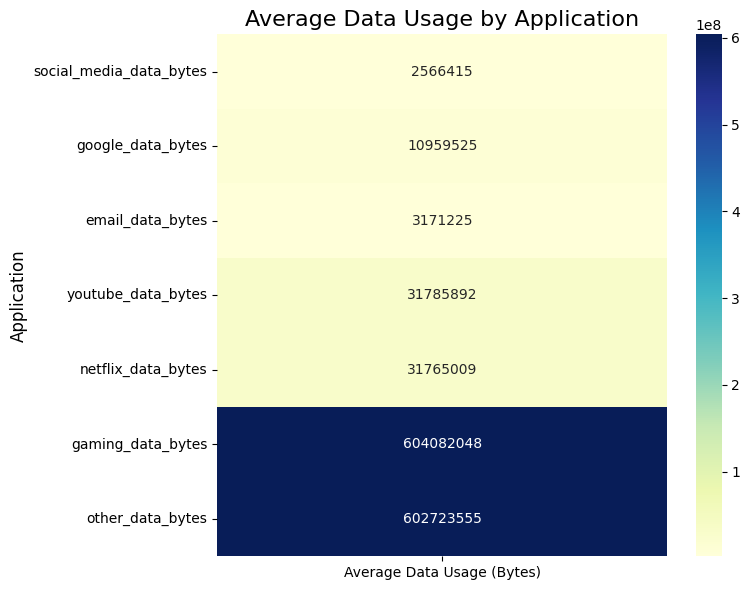

In [71]:
# Select relevant columns for heatmap
heatmap_data = user_behavior[[
    "social_media_data_bytes", "google_data_bytes", "email_data_bytes",
    "youtube_data_bytes", "netflix_data_bytes", "gaming_data_bytes", "other_data_bytes"
]].mean()

# Convert to DataFrame for heatmap
heatmap_df = pd.DataFrame(heatmap_data, columns=["Average Data Usage (Bytes)"])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title("Average Data Usage by Application", fontsize=16)
plt.ylabel("Application", fontsize=12)
plt.tight_layout()
plt.show()


In [75]:
# Display data types
print(user_behavior.dtypes)

# Basic statistics for numerical columns
user_behavior.describe()


user_id                      float64
xdr_sessions                   int64
total_session_duration_ms    float64
total_download_bytes         float64
total_upload_bytes           float64
social_media_data_bytes      float64
google_data_bytes            float64
email_data_bytes             float64
youtube_data_bytes           float64
netflix_data_bytes           float64
gaming_data_bytes            float64
other_data_bytes             float64
total_data_volume_bytes      float64
dtype: object


,user_id,xdr_sessions,total_session_duration_ms,total_download_bytes,total_upload_bytes,social_media_data_bytes,google_data_bytes,email_data_bytes,youtube_data_bytes,netflix_data_bytes,gaming_data_bytes,other_data_bytes,total_data_volume_bytes
count,1.068560e+05,106857.000000,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05
mean,4.511474e+10,1.380621,1.468438e+05,6.382035e+08,5.772370e+07,2.566415e+06,1.095953e+07,3.171225e+06,3.178589e+07,3.176501e+07,6.040820e+08,6.027236e+08,6.959272e+08
std,2.889423e+12,1.716287,2.892198e+05,1.558474e+09,1.400375e+08,6.325032e+06,2.630542e+07,7.661339e+06,7.735388e+07,7.709618e+07,1.479703e+09,1.449064e+09,1.695706e+09
min,3.360100e+10,0.000000,7.142000e+03,8.827082e+06,2.866892e+06,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,1.490450e+05,3.324901e+07
25%,3.365088e+10,1.000000,7.130900e+04,3.148302e+08,3.639554e+07,1.211309e+06,5.942683e+06,1.674484e+06,1.863145e+07,1.855607e+07,2.880666e+08,2.855649e+08,3.585530e+08
50%,3.366365e+10,1.000000,1.027410e+05,5.703713e+08,4.679434e+07,2.303811e+06,9.586186e+06,2.799854e+06,2.680040e+07,2.671955e+07,5.423501e+08,5.398401e+08,6.179232e+08
75%,3.368344e+10,2.000000,1.727990e+05,8.073701e+08,6.573376e+07,3.307524e+06,1.321496e+07,3.847205e+06,3.792829e+07,3.797722e+07,7.773115e+08,7.754189e+08,8.574358e+08
max,8.823971e+14,501.000000,7.244640e+07,4.869236e+11,4.432530e+10,1.973817e+09,8.248577e+09,2.399880e+09,2.434073e+10,2.425357e+10,4.614780e+11,4.509784e+11,5.312489e+11


In [76]:
# Add a decile column for total session duration
user_behavior["Session Duration Decile"] = pd.qcut(
    user_behavior["total_session_duration_ms"], q=5, labels=[1, 2, 3, 4, 5]
)

# Compute total data volume per decile
decile_data = user_behavior.groupby("Session Duration Decile")["total_data_volume_bytes"].sum()

# Display decile statistics
print(decile_data)


Session Duration Decile
1    1.154869e+13
2    1.257064e+13
3    1.156998e+13
4    1.397471e+13
5    2.470067e+13
Name: total_data_volume_bytes, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_6176\2139427600.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = user_behavior.groupby("Session Duration Decile")["total_data_volume_bytes"].sum()


In [77]:
# Descriptive statistics for key metrics
metrics = user_behavior[[
    "total_session_duration_ms", "total_data_volume_bytes",
    "total_download_bytes", "total_upload_bytes"
]]

# Compute basic metrics
mean_values = metrics.mean()
median_values = metrics.median()
std_values = metrics.std()

# Display results
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)


Mean Values:
 total_session_duration_ms    1.468438e+05
total_data_volume_bytes      6.959272e+08
total_download_bytes         6.382035e+08
total_upload_bytes           5.772370e+07
dtype: float64

Median Values:
 total_session_duration_ms       102741.0
total_data_volume_bytes      617923242.0
total_download_bytes         570371256.0
total_upload_bytes            46794345.0
dtype: float64

Standard Deviation:
 total_session_duration_ms    2.892198e+05
total_data_volume_bytes      1.695706e+09
total_download_bytes         1.558474e+09
total_upload_bytes           1.400375e+08
dtype: float64


In [78]:
# Dispersion metrics
print("Variance:\n", metrics.var())
print("\nRange:\n", metrics.max() - metrics.min())

Variance:
 total_session_duration_ms    8.364809e+10
total_data_volume_bytes      2.875418e+18
total_download_bytes         2.428841e+18
total_upload_bytes           1.961050e+16
dtype: float64

Range:
 total_session_duration_ms    7.243925e+07
total_data_volume_bytes      5.312157e+11
total_download_bytes         4.869148e+11
total_upload_bytes           4.432244e+10
dtype: float64


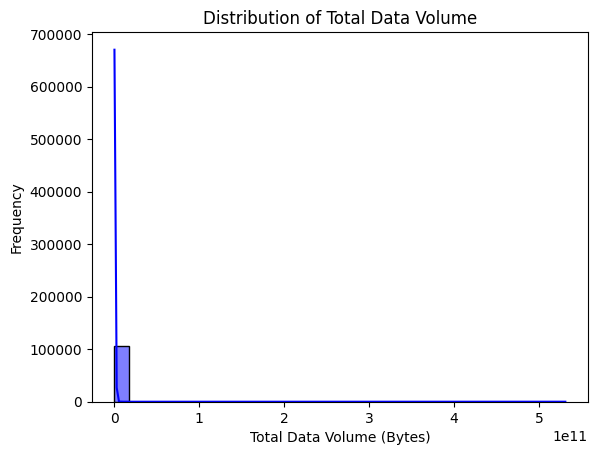

In [79]:
# Plot histogram for total data volume
sns.histplot(user_behavior["total_data_volume_bytes"], bins=30, kde=True, color="blue")
plt.title("Distribution of Total Data Volume")
plt.xlabel("Total Data Volume (Bytes)")
plt.ylabel("Frequency")
plt.show()


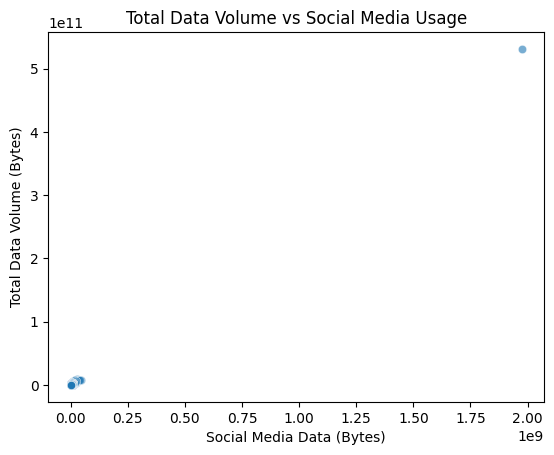

In [80]:
# Scatterplot for total data volume vs social media usage
sns.scatterplot(
    x="social_media_data_bytes", 
    y="total_data_volume_bytes", 
    data=user_behavior, 
    alpha=0.6
)
plt.title("Total Data Volume vs Social Media Usage")
plt.xlabel("Social Media Data (Bytes)")
plt.ylabel("Total Data Volume (Bytes)")
plt.show()


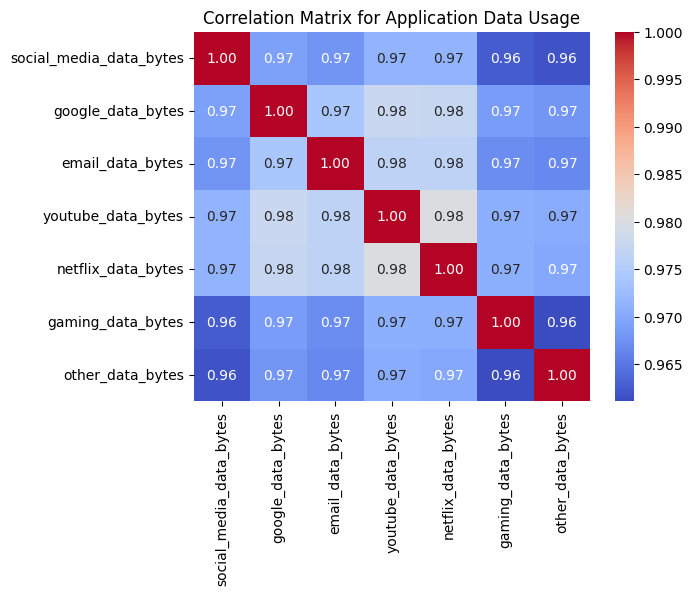

In [81]:
# Correlation matrix for application data
correlation_matrix = user_behavior[[
    "social_media_data_bytes", "google_data_bytes", "email_data_bytes",
    "youtube_data_bytes", "netflix_data_bytes", "gaming_data_bytes", "other_data_bytes"
]].corr()

# Display heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Application Data Usage")
plt.show()


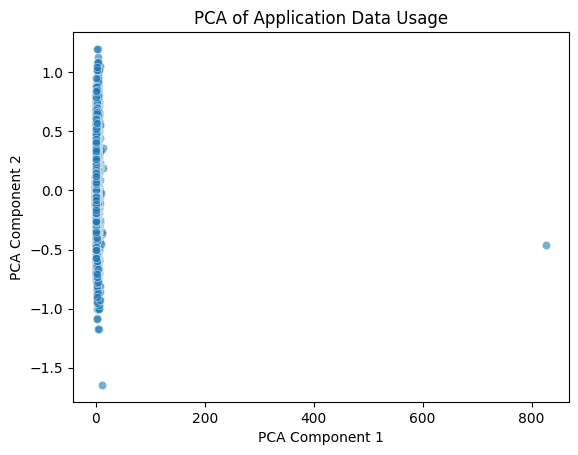

In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
app_data = user_behavior[[
    "social_media_data_bytes", "google_data_bytes", "email_data_bytes",
    "youtube_data_bytes", "netflix_data_bytes", "gaming_data_bytes", "other_data_bytes"
]]
scaled_data = scaler.fit_transform(app_data)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to DataFrame
user_behavior["PCA_1"] = pca_result[:, 0]
user_behavior["PCA_2"] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x="PCA_1", y="PCA_2", data=user_behavior, alpha=0.6)
plt.title("PCA of Application Data Usage")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [1]:
# Aggregate metrics per user
engagement_data = telecom_data.groupby("MSISDN/Number").agg({
    "bearer id": "count",  # Number of sessions
    "Dur. (ms)": "sum",  # Total session duration
    "Total DL (Bytes)": "sum",  # Total download traffic
    "Total UL (Bytes)": "sum"   # Total upload traffic
}).reset_index()

# Add total traffic column (DL + UL)
engagement_data["Total Traffic (Bytes)"] = (
    engagement_data["Total DL (Bytes)"] + engagement_data["Total UL (Bytes)"]
)

# Rename columns for clarity
engagement_data.rename(columns={
    "bearer id": "Session Frequency",
    "Dur. (ms)": "Total Session Duration (ms)",
}, inplace=True)

# Display the first few rows
print(engagement_data.head())


NameError: name 'telecom_data' is not defined